In [1]:
import datetime
import pandas as pd 
import numpy as np
import plotly.express as px
from sklearn.metrics import confusion_matrix

import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 2000)
rawdata = pd.read_csv(r"C:\Users\smeng3\Desktop\Summer_Proj\Proctcae301.csv",low_memory=False) 

In [2]:
rawdata.loc[:,"PRO3b"] = pd.to_numeric(rawdata["PRO3b"], errors='coerce')
rawdata.loc[:,"PRO3c"] = pd.to_numeric(rawdata["PRO3c"], errors='coerce')
rawdata['p3a'] = rawdata['PRO3a']
rawdata['p3b'] = rawdata['PRO3b']-1
rawdata['p3c'] = rawdata['PRO3c']-1
rawdata.loc[(rawdata['PRONever3'] == 1)&(rawdata['PRO3a'].isnull()), 'p3a'] = 0
rawdata.loc[(rawdata['PRONever3'] == 1)&(rawdata['PRO3b'].isnull()), 'p3b'] = 0
rawdata.loc[(rawdata['PRONever3'] == 1)&(rawdata['PRO3c'].isnull()), 'p3c'] = 0
q3 = rawdata[["gapid","p3a","p3b","p3c","Assessment"]]
q3_a = q3 [["gapid","p3a","Assessment"]]
q3_b = q3 [["gapid","p3b","Assessment"]]
q3_c = q3 [["gapid","p3c","Assessment"]]

In [3]:
def getPid_map(q3_x):
    name = ["_Baseline","_4_6_weeks","_3_month","_6_month"]
    for i in [1,2,3]:
        if i ==1:
            res = q3_x[(q3_x.loc[:,"Assessment"]==i)].iloc[:, :-1].set_index('gapid')
        res_b = q3_x[(q3_x.loc[:,"Assessment"]==i+1)].iloc[:, :-1]
        res = res.join(res_b.set_index('gapid'), lsuffix=name[i-1], rsuffix=name[i])
    return res

In [4]:
def err_check(df):
    err_1 = df[(df.iloc[:,0].isnull()) & ((df.iloc[:,1].isnull()==False)|(df.iloc[:,2].isnull()==False)|(df.iloc[:,3].isnull()==False))]
    err_2 = df[(df.iloc[:,1].isnull()) & ((df.iloc[:,2].isnull()==False)|(df.iloc[:,3].isnull()==False))]
    err_3 = df[(df.iloc[:,2].isnull()) & (df.iloc[:,3].isnull()==False)]
    err = err_1.append(err_2)
    err = err.append(err_3)
    drop_out_1 = df[(df.iloc[:,0].isnull()==False) &((df.iloc[:,1].isnull())&(df.iloc[:,2].isnull())&(df.iloc[:,3].isnull()))]
    drop_out_2 = df[(df.iloc[:,0].isnull()==False) &((df.iloc[:,1].isnull()==False)&(df.iloc[:,2].isnull())&(df.iloc[:,3].isnull()))]
    drop_out_3 = df[(df.iloc[:,0].isnull()==False) &((df.iloc[:,1].isnull()==False)&(df.iloc[:,2].isnull()==False)&(df.iloc[:,3].isnull()))]
    data = {'Number of patients':[len(drop_out_1.index),len(drop_out_2.index),len(drop_out_3.index)]} 
    drop_out = pd.DataFrame(data, index =['After Baseline', 'After 4-6 Weeks', 'After 3 Month']) 
    return drop_out,err 

In [5]:
a_option_time = ["p3a_Baseline","p3a_4_6_weeks","p3a_3_month","p3a_6_month"]
b_option_time = ["p3b_Baseline","p3b_4_6_weeks","p3b_3_month","p3b_6_month"]
c_option_time = ["p3c_Baseline","p3c_4_6_weeks","p3c_3_month","p3c_6_month"]
b_index = ["Not At All","A Little Bit","Somewhat","Quite a Bit","Very Much"]
a_index = ["None","Mild","Moderate","Severe","Very Severe"]

In [6]:
def get_merged_data(q3_a,q3_b, a_option_time, b_option_time, num , a_index,b_index):
    ans = [False]*num + [True]*(4-num)
    option1 = getPid_map(q3_a).loc[(getPid_map(q3_a)[a_option_time[0]].isnull()==ans[0])&(getPid_map(q3_a)[a_option_time[1]].isnull()==ans[1])
                         &(getPid_map(q3_a)[a_option_time[2]].isnull()==ans[2])&(getPid_map(q3_a)[a_option_time[3]].isnull()==ans[3])]
    option2 = getPid_map(q3_b).loc[(getPid_map(q3_b)[b_option_time[0]].isnull()==ans[0])&(getPid_map(q3_b)[b_option_time[1]].isnull()==ans[1])
                         &(getPid_map(q3_b)[b_option_time[2]].isnull()==ans[2])&(getPid_map(q3_b)[b_option_time[3]].isnull()==ans[3])]
    merged = pd.merge(option1, option2, on='gapid', how='inner') 
    mask = pd.DataFrame(np.zeros(shape=(5,5)))

    
    a1 = confusion_matrix(merged[a_option_time[0]], merged[b_option_time[0]])
    a1 = pd.DataFrame(a1).add(mask, fill_value=0).values

    a1 = pd.DataFrame(data=a1,index=a_index,columns=b_index)    
    aa = a1

    if num>1:
        a2 = confusion_matrix(merged[a_option_time[1]], merged[b_option_time[1]])
        a2 = pd.DataFrame(a2).add(mask, fill_value=0).values
        a2 = pd.DataFrame(data=a2,index=a_index,columns=b_index) 
        aa = pd.concat([a1, a2], axis=1, join='inner')

    if num>2:
        a3 = confusion_matrix(merged[a_option_time[2]], merged[b_option_time[2]])
        a3 = pd.DataFrame(a3).add(mask, fill_value=0).values
        a3 = pd.DataFrame(data=a3,index=a_index,columns=b_index) 
        aa = pd.concat([a1, a2,a3], axis=1, join='inner')
    if num>3:
        a4 = confusion_matrix(merged[a_option_time[3]], merged[b_option_time[3]])
        a4 = pd.DataFrame(a4).add(mask, fill_value=0).values
        a4 = pd.DataFrame(data=a4,index=a_index,columns=b_index) 

        aa = pd.concat([a1, a2,a3,a4], axis=1, join='inner')
    return aa


In [7]:
ab_with4 = get_merged_data(q3_b,q3_c, b_option_time, c_option_time,4,a_index,b_index)/165*100
ab_with3 = get_merged_data(q3_b,q3_c, b_option_time, c_option_time,3,a_index,b_index)/39*100
ab_with2 = get_merged_data(q3_b,q3_c, b_option_time, c_option_time,2,a_index,b_index)/39*100
ab_with1 = get_merged_data(q3_b,q3_c, b_option_time, c_option_time,1,a_index,b_index)/41*100

In [8]:
ab_with1.sum()

Not At All      85.365854
A Little Bit    12.195122
Somewhat         2.439024
Quite a Bit      0.000000
Very Much        0.000000
dtype: float64

In [9]:
def plot(aa,num,val,name):
    f,ax = plt.subplots(figsize=(5*num, 4))
    ax = sns.heatmap(aa, annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="YlGnBu", vmax=val,cbar_kws={'label': 'Precentage of Patient'})
#     ax.set(xlabel='Severity',xmargin=-0.1,ylabel='Frequency')
#     ax.text(x=0.5, y=1.1, s='Distribution of Patient having headache in GAP dataset', fontsize=10, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#     ax.text(x=0.5, y=1.03, s='Frequency V.S Severity Heatmap Matrix (n:165)', fontsize=10, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
    plt.xticks(rotation=75)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Arial')
        label.set_fontsize(20)

    f.savefig(name+".tif",bbox_inches = 'tight')

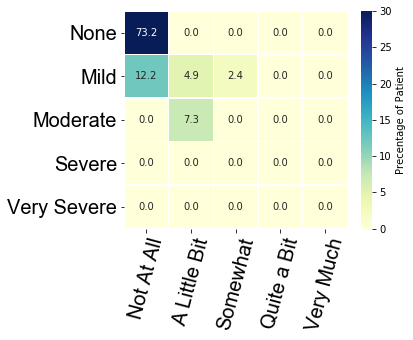

In [19]:
plot(ab_with1,1,30,"100")

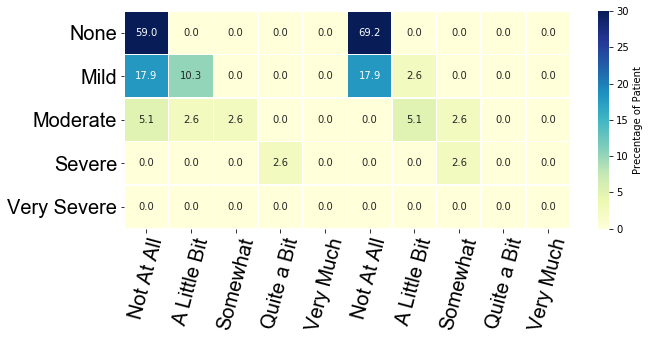

In [20]:
plot(ab_with2,2,30,"200")


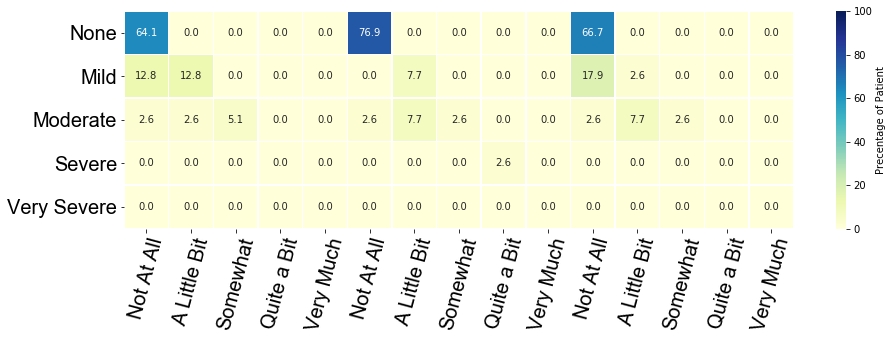

In [21]:
plot(ab_with3,3,100,"300")

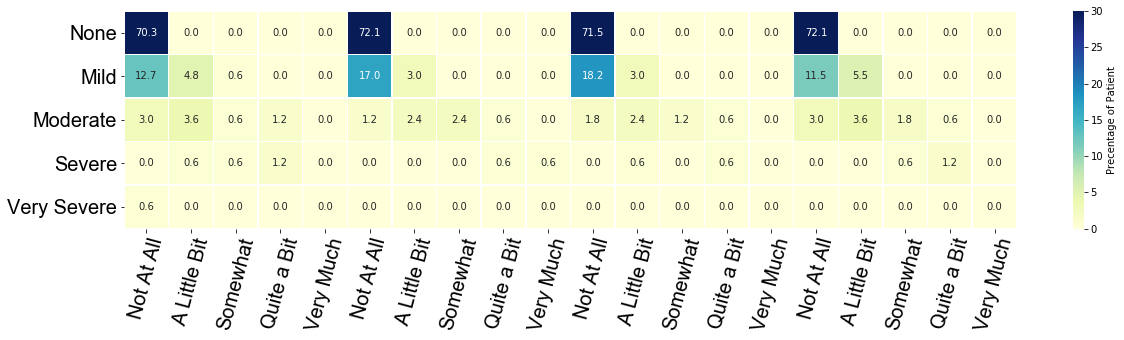

In [23]:
plot(ab_with4,4,30,"400")

In [14]:
drop_out,err = err_check(getPid_map(q3_a))

In [15]:
drop_out

,Number of patients
After Baseline,41
After 4-6 Weeks,39
After 3 Month,39


In [16]:
err

,p3a_Baseline,p3a_4_6_weeks,p3a_3_month,p3a_6_month
gapid,,,,
11077.0,NaN,3.0,0.0,1.0
11122.0,NaN,0.0,0.0,1.0
11140.0,NaN,0.0,0.0,NaN
11180.0,1.0,NaN,NaN,1.0
11281.0,1.0,NaN,1.0,2.0
11050.0,1.0,0.0,NaN,0.0
11089.0,1.0,0.0,NaN,0.0
11180.0,1.0,NaN,NaN,1.0


In [17]:
len(getPid_map(q3_a))

292

In [18]:
len(rawdata["gapid"].unique())

302